# Feature engineering and modeling for Avazu Kaggle competition
# Click Through Rate Prediction

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("avazu_train_tiny.csv")
val = pd.read_csv("avazu_valid_tiny.csv")

In [4]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [5]:
val.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


In [6]:
print(train.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                499 non-null    uint64
 1   click             499 non-null    int64 
 2   hour              499 non-null    int64 
 3   C1                499 non-null    int64 
 4   banner_pos        499 non-null    int64 
 5   site_id           499 non-null    object
 6   site_domain       499 non-null    object
 7   site_category     499 non-null    object
 8   app_id            499 non-null    object
 9   app_domain        499 non-null    object
 10  app_category      499 non-null    object
 11  device_id         499 non-null    object
 12  device_ip         499 non-null    object
 13  device_model      499 non-null    object
 14  device_type       499 non-null    int64 
 15  device_conn_type  499 non-null    int64 
 16  C14               499 non-null    int64 
 17  C15             

## Adding Date and Hour columns

In [7]:
train['date'] = '20' + train['hour'].astype(str)
train['date'] = pd.to_datetime(train['date'],format='%Y%m%d%H')

In [8]:
val['date'] = '20' + val['hour'].astype(str)
val['date'] = pd.to_datetime(val['date'],format='%Y%m%d%H')

In [9]:
train['hour'] = train["hour"].apply(lambda x: str(x)[-2:])

In [10]:
val['hour'] = val["hour"].apply(lambda x: str(x)[-2:])

In [11]:
train.drop("id", axis=1, inplace=True)

In [12]:
val.drop("id", axis=1, inplace=True)

In [13]:
train['Day'] = train['date'].dt.day_name()

In [14]:
val['Day'] = val['date'].dt.day_name()

In [15]:
train.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,date,Day
0,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,-1,79,2014-10-21,Tuesday
1,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,2014-10-21,Tuesday
2,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,2014-10-21,Tuesday
3,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,100084,79,2014-10-21,Tuesday
4,0,00,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,18993,320,50,2161,0,35,-1,157,2014-10-21,Tuesday


In [16]:
val.head()

,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C14,C15,C16,C17,C18,C19,C20,C21,date,Day
0,00,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,8330,320,50,761,3,175,100075,23,2014-10-31,Friday
1,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,22676,320,50,2616,0,35,100083,51,2014-10-31,Friday
2,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,22676,320,50,2616,0,35,100083,51,2014-10-31,Friday
3,00,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,a99f214a,...,18648,320,50,1092,3,809,100156,61,2014-10-31,Friday
4,00,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,a99f214a,...,23160,320,50,2667,0,47,-1,221,2014-10-31,Friday


## Regularized Mean Encoding of 2 Features

In [17]:
from sklearn.model_selection import KFold

def reg_target_encoding(train, col="device_type", target="click", splits=5):
    """ Computes regularize mean encoding.
    Inputs:
       train: training dataframe
       
    """
    kf = KFold(n_splits=splits, shuffle=False)
    new_col = col + "_" + "mean_enc"
    ### BEGIN SOLUTION
    for i, j in kf.split(train):
        step1 = train.loc[i]
        step2 = step1.groupby(col)
        mean_enc = step2.click.mean()
        train.loc[j, col + "_mean_enc"] = train.loc[j][col].map(mean_enc)
    ### END SOLUTION


def mean_encoding_test(test, train, col="device_type", target="click"):
    """ Computes target enconding for test data.

    This is similar to how we do validation
    """
    ### BEGIN SOLUTION
    reg_target_encoding(train, col = col, splits=5)
    step1 = train.groupby(col)
    mean_enc = step1.click.mean()
    test[col + "_mean_enc"] = test[col].map(mean_enc)
    ### END SOLUTION

In [18]:
mean_encoding_test(val, train, col = "Day", target="click")
mean_encoding_test(val, train, col = "site_domain", target="click")
mean_encoding_test(val, train, col = "site_category", target="click")

In [19]:
train[["Day_mean_enc", "site_domain_mean_enc", "site_category_mean_enc"]]

,Day_mean_enc,site_domain_mean_enc,site_category_mean_enc
0,0.16792,0.165414,0.166667
1,0.16792,0.165414,0.166667
2,0.16792,0.165414,0.166667
3,0.16792,0.165414,0.166667
4,0.16792,0.500000,0.500000
...,...,...,...
494,0.18000,0.034483,0.142857
495,0.18000,0.185714,0.178808
496,0.18000,0.185714,0.178808
497,0.18000,0.183673,0.194175


### Filling NAs in Train and Val with target y mean

In [20]:
global_mean = train.click.mean()
train.fillna(global_mean, inplace=True)
val.fillna(global_mean, inplace=True)

## Loading full data and splitting into train/test

In [21]:
data = pd.read_csv("train.gz")

In [22]:
# 80:20 train:test split
N = int(0.8*len(data))
train_df = data[:N].copy()
val_df = data[N:].copy()

In [23]:
# Applying the changes from tiny data to full data
train_df['date'] = '20' + train_df['hour'].astype(str)
train_df['date'] = pd.to_datetime(train_df['date'],format='%Y%m%d%H')
val_df['date'] = '20' + val_df['hour'].astype(str)
val_df['date'] = pd.to_datetime(val_df['date'],format='%Y%m%d%H')
train_df['hour'] = train_df["hour"].apply(lambda x: str(x)[-2:])
val_df['hour'] = val_df["hour"].apply(lambda x: str(x)[-2:])
train_df.drop("id", axis=1, inplace=True)
val_df.drop("id", axis=1, inplace=True)
train_df['Day'] = train_df['date'].dt.day_name()
val_df['Day'] = val_df['date'].dt.day_name()

In [24]:
train_df.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,date,Day
0,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,-1,79,2014-10-21,Tuesday
1,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,2014-10-21,Tuesday
2,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,2014-10-21,Tuesday
3,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,100084,79,2014-10-21,Tuesday
4,0,00,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,18993,320,50,2161,0,35,-1,157,2014-10-21,Tuesday


In [25]:
val_df.reset_index(drop=True, inplace=True)

In [26]:
val_df.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,date,Day
0,0,23,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,...,18595,320,50,2104,3,1839,-1,171,2014-10-28 23:00:00,Tuesday
1,0,23,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,22106,320,50,2545,0,167,100083,221,2014-10-28 23:00:00,Tuesday
2,0,23,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,...,17753,320,50,1993,2,1063,-1,33,2014-10-28 23:00:00,Tuesday
3,0,23,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,...,17753,320,50,1993,2,1063,-1,33,2014-10-28 23:00:00,Tuesday
4,0,23,1005,0,85f751fd,c4e18dd6,50e219e0,e2a1ca37,2347f47a,8ded1f7a,...,17016,320,50,1873,3,39,-1,23,2014-10-28 23:00:00,Tuesday


## Using plots and value_counts()

### Plotting Clicks By Hour

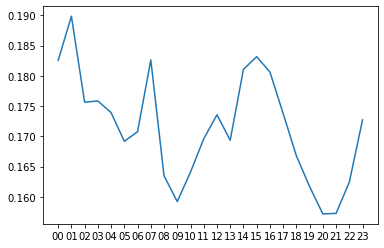

In [102]:
df = pd.DataFrame({'avg_clicks' : train_df["click"].groupby(train_df['hour']).mean()}).reset_index()
plt.plot(df.hour, df.avg_clicks)
plt.show()

### Plotting Clicks By Day of Week

Text(0, 0.5, 'avg_clicks')

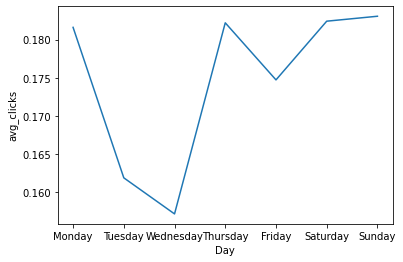

In [113]:
df = pd.DataFrame({'avg_clicks' : train_df["click"].groupby(train_df['Day']).mean()}).reset_index()
# plt.plot(df.Day, df.avg_clicks)
# plt.show()
field = "Day"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = df.set_index(field).loc[day_order].plot(kind="line", legend=False)
ax.set_ylabel("avg_clicks")

### Value Counts

In [116]:
train_df.Day.value_counts()

Tuesday      9375969
Wednesday    5337126
Thursday     3870752
Sunday       3835892
Saturday     3363122
Friday       3335302
Monday       3225010
Name: Day, dtype: int64

In [117]:
# only contains 3 days
val_df.Day.value_counts()

Thursday     4218938
Wednesday    3832608
Tuesday        34248
Name: Day, dtype: int64

## Fitting Random Forest On Subset

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, auc, roc_curve

In [30]:
mean_encoding_test(val, train, col = "site_id", target="click")
mean_encoding_test(val, train, col = "app_id", target="click")

In [31]:
mean_encoding_test(val, train, col = "app_domain", target="click")
mean_encoding_test(val, train, col = "app_category", target="click")

In [32]:
mean_encoding_test(val, train, col = "device_id", target="click")
mean_encoding_test(val, train, col = "device_ip", target="click")
mean_encoding_test(val, train, col = "device_model", target="click")

In [33]:
train.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,Day_mean_enc,site_domain_mean_enc,site_category_mean_enc,site_id_mean_enc,app_id_mean_enc,app_domain_mean_enc,app_category_mean_enc,device_id_mean_enc,device_ip_mean_enc,device_model_mean_enc
0,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0.16792,0.165414,0.166667,0.165414,0.189711,0.182371,0.191083,0.17052,0.333333,NaN
1,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0.16792,0.165414,0.166667,0.165414,0.189711,0.182371,0.191083,0.17052,NaN,0.428571
2,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0.16792,0.165414,0.166667,0.165414,0.189711,0.182371,0.191083,0.17052,NaN,0.096774
3,0,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0.16792,0.165414,0.166667,0.165414,0.189711,0.182371,0.191083,0.17052,NaN,0.000000
4,0,00,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,0.16792,0.500000,0.500000,0.500000,0.189711,0.182371,0.191083,0.17052,NaN,0.000000


In [34]:
X_train = train.drop(['device_id', 'device_ip', 'date',
                      'device_model','click', 'site_id', 'app_id', 'site_domain',
                      'site_category', 'app_category', 'app_domain', 'Day'], axis=1)
y_train = train['click']

In [35]:
global_mean = train.click.mean()
X_train.fillna(global_mean, inplace=True)

### Hyperparameter Tuning 

In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [37]:
rf = RandomForestClassifier()

In [38]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [39]:
X_train.head()

,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,...,Day_mean_enc,site_domain_mean_enc,site_category_mean_enc,site_id_mean_enc,app_id_mean_enc,app_domain_mean_enc,app_category_mean_enc,device_id_mean_enc,device_ip_mean_enc,device_model_mean_enc
0,00,1005,0,1,2,15706,320,50,1722,0,...,0.16792,0.165414,0.166667,0.165414,0.189711,0.182371,0.191083,0.17052,0.333333,0.174349
1,00,1005,0,1,0,15704,320,50,1722,0,...,0.16792,0.165414,0.166667,0.165414,0.189711,0.182371,0.191083,0.17052,0.174349,0.428571
2,00,1005,0,1,0,15704,320,50,1722,0,...,0.16792,0.165414,0.166667,0.165414,0.189711,0.182371,0.191083,0.17052,0.174349,0.096774
3,00,1005,0,1,0,15706,320,50,1722,0,...,0.16792,0.165414,0.166667,0.165414,0.189711,0.182371,0.191083,0.17052,0.174349,0.000000
4,00,1005,1,1,0,18993,320,50,2161,0,...,0.16792,0.500000,0.500000,0.500000,0.189711,0.182371,0.191083,0.17052,0.174349,0.000000


In [40]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.5s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

### Tuned Hyperparams on tiny data for Final Model on Full Data

In [42]:
rf = RandomForestClassifier(n_estimators=200,
 min_samples_split=5,
 min_samples_leaf=2,
 max_features='sqrt',
 max_depth=10,
 bootstrap=True)

## Fitting Final Model

In [62]:
mean_encoding_test(val_df, train_df, col = "site_id", target="click")
mean_encoding_test(val_df, train_df, col = "app_id", target="click")

In [63]:
mean_encoding_test(val_df, train_df, col = "app_domain", target="click")
mean_encoding_test(val_df, train_df, col = "app_category", target="click")

In [64]:
mean_encoding_test(val_df, train_df, col = "device_id", target="click")
mean_encoding_test(val_df, train_df, col = "device_ip", target="click")

In [65]:
mean_encoding_test(val_df, train_df, col = "device_model", target="click")

In [66]:
train_df.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C21,date,Day,site_id_mean_enc,app_id_mean_enc,app_domain_mean_enc,app_category_mean_enc,device_id_mean_enc,device_ip_mean_enc,device_model_mean_enc
0,0,16,1005,0,85f751fd,c4e18dd6,50e219e0,c732c8ab,2347f47a,0f2161f8,...,79,2014-10-27 16:00:00,Monday,0.123507,NaN,0.138090,0.123094,0.169612,NaN,0.213483
1,1,14,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,23,2014-10-21 14:00:00,Tuesday,0.405556,0.190789,0.187119,0.191458,0.169612,NaN,0.160000
2,0,04,1010,1,85f751fd,c4e18dd6,50e219e0,8c0dcd5a,7801e8d9,0f2161f8,...,68,2014-10-22 04:00:00,Wednesday,0.123507,0.000000,0.187119,0.123094,NaN,NaN,0.225352
3,1,00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,79,2014-10-21 00:00:00,Tuesday,0.199150,0.190789,0.187119,0.191458,0.169612,0.190476,0.350000
4,0,03,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,52,2014-10-24 03:00:00,Friday,0.199150,0.190789,0.187119,0.191458,0.169612,NaN,NaN


In [67]:
val_df.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C21,date,Day,site_id_mean_enc,app_id_mean_enc,app_domain_mean_enc,app_category_mean_enc,device_id_mean_enc,device_ip_mean_enc,device_model_mean_enc
0,0,13,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,07d7df22,...,23,2014-10-30 13:00:00,Thursday,0.101796,0.189340,0.185866,0.190136,0.169111,NaN,0.145631
1,0,12,1005,0,85f751fd,c4e18dd6,50e219e0,685d1c4c,2347f47a,8ded1f7a,...,221,2014-10-30 12:00:00,Thursday,0.122002,0.046512,0.139042,0.089347,0.169111,NaN,0.000000
2,0,01,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,...,61,2014-10-30 01:00:00,Thursday,0.122002,0.061798,0.061798,0.119182,0.169111,NaN,0.084507
3,0,05,1005,0,85f751fd,c4e18dd6,50e219e0,f53417e1,0e8616ad,0f2161f8,...,229,2014-10-30 05:00:00,Thursday,0.122002,0.025000,0.036145,0.119182,0.169111,NaN,0.250000
4,0,02,1005,0,85f751fd,c4e18dd6,50e219e0,73206397,2347f47a,8ded1f7a,...,221,2014-10-29 02:00:00,Wednesday,0.122002,0.046512,0.139042,0.089347,NaN,NaN,0.250000


In [68]:
global_mean = train_df.click.mean()
train_df.fillna(global_mean, inplace=True)
val_df.fillna(global_mean, inplace=True)

In [69]:
X_train = train_df.drop(['device_id', 'device_ip', 'date',
                      'device_model','click', 'site_id', 'app_id', 'site_domain',
                      'site_category', 'app_category', 'app_domain', 'Day'], axis=1)
y_train = train_df['click']
X_val = val_df.drop(['device_id', 'device_ip', 'date',
                      'device_model','click', 'site_id', 'app_id', 'site_domain',
                      'site_category', 'app_category', 'app_domain', 'Day'], axis=1)
y_val = val_df['click']

In [70]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200)

In [71]:
pred_train = rf.predict_proba(X_train)
pred = rf.predict_proba(X_val)

In [72]:
print('Train Loss:', log_loss(y_train, pred_train[:,1]) )
print('Test Loss:', log_loss(y_val, pred[:,1]) )

Train Loss: 0.3477580571849871
Test Loss: 0.4061217642170201
